# Scalar and Vector Functions

(adapted from CHEM 1000 - Spring 2023 by Prof. Geoffrey Hutchison, University of Pittsburgh)


Chapter 5 in [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)

By the end of this session, you should be able to:
- Understand the concept of vector-valued functions and vector fields
- Identify sinks, sources, and saddle points of vector fields
- Understand the concept of vector operators
- Understand the gradient and applications to chemistry (e.g., forces)

## Scalars vs. Vectors

Reminder...

**Scalars** are just numbers - they have a magnitude, a size. The mass of a molecule would be an example, e.g., 120 amu.

**Vectors** have both a magnitude and a direction:
- velocity $\mathbf{v}$
- acceleration $\mathbf{a}$
- force $\mathbf{F}$
- electric field $\mathbf{E}$

### Scalar Functions and Vector Functions

A **function** takes in a number, a vector, etc. and returns a number:

$$
\sin 0 = 0
$$

Notice that $\sin x$ is a scalar function. You give it something, and it returns a **scalar**.

By extension, there must be **vector functions** too - one that returns a vector for every point.

Right now, you're experiencing force due to gravity. If you stand up, the forces acting on your body change over time. (Consider if you go on a roller coaster or fly in an airplane.)

$$
\overrightarrow{\boldsymbol{F}}(t)
$$

Notice that time is a scalar - it's just a number. So a vector function returns a vector regardless of what the input is. It might be one-dimensional (e.g., the force we feel at a given time $t$) or 2D or 3D, etc. (e.g., the forces on a satellite in space .. we probably care about the position of the satellite but maybe also time.)

## Vector Fields

When we have a vector function in 2D or 3D, we usually call these **vector fields**. 

<div class="alert alert-block alert-success">

A **vector field** is a function that return a vector for every (x,y) or (x, y, z) point.
    
</div>

It sounds abstract, but we're actually already familiar with the concept. Consider a weather map showing wind:

<img src='./images/wind-vectors.png' width="540" />

Depending on our location, the wind speed and vector will differ. Let's look at a [tropical cyclone (Hurricane 
Sally)](https://en.wikipedia.org/wiki/Tropical_Storm_Sally_(2020)) in the Gulf of Mexico.

<img src='./images/hurricane.png' width="505" />

Obviously, the further away from the hurricane, the wind speed (magnitude) decreases, and there's an *eye* in the center, where there's no wind at all. Also, the vector direction differs depending on where you are.

In chemistry, we encounter a range of vector functions and vector fields. For example:

- The force acting on a charge in an electric field. At each point in space, the force acting on the charge will have a specific magnitude and a direction.
- Fluid flow for which each element of the fluid at some point in space has a given speed and direction of flow. 

There are a few key terms with vector fields:
- a **sink** is a point in which all vectors flow inward
- a **source** is a point at which all vectors flow outward
- a **saddle-point** has no net inward or outward flow (i.e., they balance exactly)

<img src='./images/vector-field.png'  width="505" />

(Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/)) 

Here, the red point is a **source** and all the arrows point away from it (imagine the forces from a negative charge towards an electron). 

The black point is a **sink** and all the arrows point towards it (e.g., a positive charge that will attract an electron).

The two "X" points are **saddle points**. Notice that they come inward along one direction and outward along another direction. (Think about a horse saddle that rises up to the neck and head and also to the tail, and slopes down along the sides.)

## Example Vector Field

Let's try plotting

$$
\vec{F}=\frac{x}{5} \hat{\mathbf{x}}+\frac{y}{5} \hat{\mathbf{y}}
$$

We'll use `numpy` and `matplotlib`. The code is a bit different because we're creating a "quiverplot".

In [2]:
# Let's plot some vector fields with numpy and matplotlib
# this is just our normal 'import numpy and matplotlib' code
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


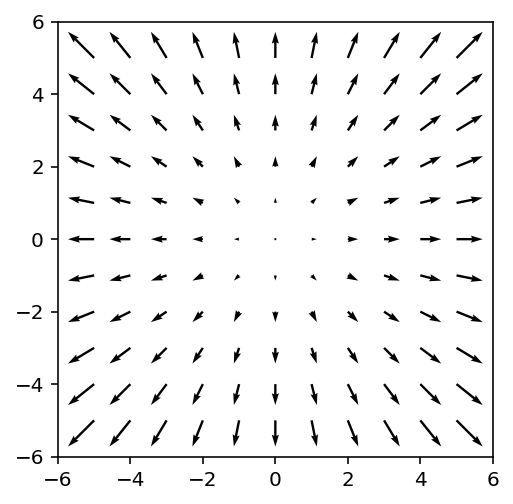

In [3]:
# Example adapted from: 
# https://pythonforundergradengineers.com/quiver-plot-with-matplotlib-and-jupyter-notebooks.html

# we're going to create a set of points from -5 to +5
# along x and y axes
x = np.arange(-5,6,1) # remember that np.arange() doesn't include the end value
y = np.arange(-5,6,1)
# remember, this takes the numpy arrays above and makes a mesh
X, Y = np.meshgrid(x, y)

# here's how we express the function
F_x = X/5 # x component
F_y = Y/5 # y component

# here's how we create a "quiver plot" with matplotlib
# if you want to know more, please ask
fig, ax = plt.subplots() # create a figure

ax.quiver(X,Y,F_x,F_y) # axis.quiver( X, Y mesh, Func X, Func Y )

# We'll go from -6 to +6 on each axis
# to see the arrows
ax.axis([-6, 6, -6, 6])
ax.set_aspect('equal') # make sure it's exactly square

plt.show()

<div class="alert alert-block alert-info">

**In the plot above, what kind of a point is at the origin?**
    
</div>

Let's try another example. This time, we'll plot:

$$
\vec{F}=\frac{x}{5} \hat{\mathbf{x}} - \frac{y}{5} \hat{\mathbf{y}}
$$

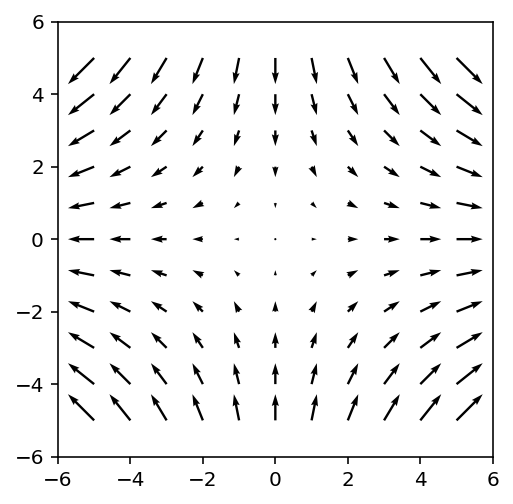

In [4]:
# here's how we express the function
F_x = +X/5 # x component
F_y = -Y/5 # y component

fig, ax = plt.subplots() # create a figure
ax.quiver(X,Y,F_x,F_y) # axis.quiver( X, Y mesh, Func X, Func Y )

# We'll go from -6 to +6 on each axis
# to see the arrows
ax.axis([-6, 6, -6, 6])
ax.set_aspect('equal') # make sure it's exactly square

plt.show()

<div class="alert alert-block alert-info">

**Now what kind of point is at the origin?**
    
</div>

**Gradients**

Perhaps one of the most useful vector functions / vector fields in chemistry comes from the **gradient** of a scalar function.

<div class="alert alert-block alert-success">

The **gradient** operator in 2D Cartesian coordinates (x, y) is 
$$
\boldsymbol{\nabla} \equiv \hat{\mathbf{x}} \frac{\partial}{\partial x}+\hat{\mathbf{y}} \frac{\partial}{\partial y}
$$
    
</div>

We use $\boldsymbol{\nabla}$ as a short-hand for the gradient operator, no matter what coordinate system is. Particularly in polar or spherical coordinates the expression can get complicated.

So what does it do?

$$
\boldsymbol{\nabla} V(x, y) = \left(\hat{\mathbf{x}} \frac{\partial}{\partial x}+\hat{\mathbf{y}} \frac{\partial}{\partial y}\right) V(x, y)
$$

At every point (x,y) we take the partial derivative of $V(x,y)$ (a scalar function) with respect to x and y, and use those as the x-component and y-component of a vector.

In other words, the gradient operator returns a **vector** from a **scalar** function.

**Laplace Operator**

<div class="alert alert-block alert-success">

The **Laplace** operator (sometimes called the Laplacian) in 2D Cartesian coordinates (x, y) is 

$$
\nabla^{2} \equiv \frac{\partial^{2}}{\partial x^{2}}+\frac{\partial^{2}}{\partial y^{2}}
$$

</div>

We use $\nabla^2$ as a short-hand for the Laplace operator, no matter what coordinate system we use. At every point, we take the second partial derivatives of a function, and add the components.

The Laplace operator takes a scalar function and returns a new scalar function.

**Potential Energy and Forces**

Consider the interaction of two atoms according to the [Lennard-Jones potential](https://en.wikipedia.org/wiki/Lennard-Jones_potential):

$$
V(r)=4 \varepsilon\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$

where $r$ is the distance between the two atoms, $\sigma$ represents the atomic diameter (or the sum of the two atomic radii), and $\epsilon$ represents the binding energy. In this case, we know that there will be a minimum energy at:

$$
r_{\min }=\sqrt[6]{2} \sigma
$$

Image from [*Mathematical Methods for Chemists*](http://sites.bu.edu/straub/mathematical-methods-for-molecular-science/):

<img src="./images/lennard-jones.png"  width="381"/>

Now the force will depend on the potential energy:

$$
\mathbf{F}=-\left[\hat{\mathbf{x}} \frac{\partial}{\partial x}+\hat{\mathbf{y}} \frac{\partial}{\partial y}+\hat{\mathbf{z}} \frac{\partial}{\partial z}\right] V(x, y, z)=-\nabla V(x, y, z)
$$

Put simply, the forces are the gradient of the potential energy!

$$
\mathbf{F}=-\boldsymbol{\nabla} V
$$

We can even do the work in this case - it's one-dimensional in $\hat{\mathbf{r}}$:

$$
\mathbf{F}(r)=-\frac{d V(r)}{d r} \hat{\mathbf{r}}=4 \varepsilon\left[12\left(\frac{\sigma^{12}}{r^{13}}\right)-6\left(\frac{\sigma^6}{r^7}\right)\right] \hat{\mathbf{r}}
$$

So when $r < r_{min}$ the repulsive force proportional to $1/r^{12}$ dominates the total force and pushes in a positive direction, while at distances $r > r_{min}$ the attractive force proportional to $1/r^6$ is dominant and pushes in a negative direction.

<div class="alert alert-block alert-info">
Notice that the forces on the atom always aim to minimize the energy:
    
- If the two atoms are close together, the repulsive force pushes in a direction towards $r_{min}$. 
- If the two atoms are far apart, the attractive force pulls in a direction towards $r_{min}$.
</div>

While the Lennard-Jones potential has a very simple one-dimensional form (e.g., one atom is at the origin and the other is some distance $r$ away), the concept of the gradient and forces applies regardless of the potential energy.

If we have some method to calculate the potential energy (e.g., quantum chemistry, etc.) we can take the gradient, get the forces on the atoms, and move them accordingly to get a minimum energy.

<img src="./images/atom-forces.png" width="341" />

In this case, we can see that the central carbon-carbon bond is too short and the carbon atoms are pulling apart, resulting in the hydrogen atoms moving in different directions.

Eventually as we repeat the process (find the gradient and forces, move the atoms a bit, re-calculate), we can minimize the potential energy and find an optimized geometry.

**Example problem:**

For a scalar potential energy, $V(x, y, z)=x^{2}+y^{2}+z^{2}$, derive the force defined as the negative gradient of the potential.

In [5]:
from sympy import init_session
init_session()

IPython console for SymPy 1.11.1 (Python 3.9.7-64-bit) (ground types: python)

These commands were executed:
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.11.1/



In [6]:
V = x**2 + y**2 + z**2
# get the x-component
diff(V, x)

2⋅x

In [7]:
# the y-component
diff(V, y)

2⋅y

In [8]:
# the z-component
diff(V, z)

2⋅z

Okay, we probably could have done that by inspection.

$$
\boldsymbol{\nabla} V(x,y,z) = 2x \hat{\mathbf{x}} + 2y \hat{\mathbf{y}} + 2z \hat{\mathbf{z}}
$$

<div class="alert alert-block alert-info">

**If that's the gradient, what are the forces?**
    
</div>

## Gradient in Spherical Coordinates

One last thing.. so far, we've expressed the gradient in 2D or 3D Cartesian coordinates, and it's not too bad.

In spherical coordinates, it's a little messier:

$$
\boldsymbol{\nabla} V=\hat{\mathbf{r}} \frac{\partial V}{\partial r}+\hat{\boldsymbol{\theta}} \frac{1}{r} \frac{\partial V}{\partial \theta}+\hat{\boldsymbol{\varphi}} \frac{1}{r \sin \theta} \frac{\partial V}{\partial \varphi}
$$

The Laplace operator is similarly messy:

$$
\nabla^{2} V=\frac{1}{r^{2}} \frac{\partial}{\partial r}\left(r^{2} \frac{\partial V}{\partial r}\right)+\frac{1}{r^{2} \sin \theta} \frac{\partial}{\partial \theta}\left(\sin \theta \frac{\partial V}{\partial \theta}\right)+\frac{1}{r^{2} \sin ^{2} \theta} \frac{\partial^{2} V}{\partial \varphi^{2}}
$$

We'll come back to these as we need them, but it's a nice illustration of why we use operators. We can write a short symbol and it represents a longer, messier operator.

-------
This notebook is from Prof. Geoffrey Hutchison, University of Pittsburgh
https://github.com/ghutchis/chem1000

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a>